# Création de CNN à partir des recherches de CAO et CHOE

## Importation des modules

In [1]:
!pip install -r requirements.txt

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
from torchvision import datasets, transforms
from torchsummary import summary 
from torchvision import models

In [4]:
#importation des fichiers pour utiliser les fonctions
from Medium_CNN import MediumCNN, MediumFit,ConvNet,NewCNN, ConvNet_mod, plot_accuracy,plot_loss
from DC_CNN import CNNet, fit_CNN, val_CNN

## Importation des images

In [5]:

train = datasets.ImageFolder("./train_another",transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

#Validation
validation = datasets.ImageFolder("./validation_another",transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

In [6]:
#Chargement en DataLoader avec batch 128 pour éviter les crashs en entrainement et shuffle
#pour mélanger les batchs à chaque étape de l'entrainement
train_dl = torch.utils.data.DataLoader(train, 20, shuffle = True, num_workers = 0, pin_memory = True)

val_dl = torch.utils.data.DataLoader(validation, 20, shuffle = True,num_workers = 0, pin_memory = True)

In [7]:


train_damage_dir = './train_another/damage'
validation_damage_dir = './validation_another/damage'
test_damage_dir = './test_another/damage'

train_nodamage_dir = './train_another/no_damage'
validation_nodamage_dir = './validation_another/no_damage'
test_nodamage_dir = './test_another/no_damage'



In [8]:
print('total training damage images: ',len(os.listdir(train_damage_dir)))
print('total validation damage images: ',len(os.listdir(validation_damage_dir)))
print('total test damage images: ',len(os.listdir(test_damage_dir)))

print('total training no damage images: ',len(os.listdir(train_nodamage_dir)))
print('total validation no damage images: ',len(os.listdir(validation_nodamage_dir)))
print('total test no damage images: ',len(os.listdir(test_nodamage_dir)))

total training damage images:  5000
total validation damage images:  1000
total test damage images:  8000
total training no damage images:  5000
total validation no damage images:  1000
total test no damage images:  1000


## Reproduction du 1er modèle et du meilleure modèle obtenue

### Reproduction du premier modèle 

In [27]:
#definision du premier CNN
model = MediumCNN()
model

MediumCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=6272, out_features=512, bias=True)
    (14): ReLU()
    (15): Linear(in_features=512, out_features=2, bias=True)
    (16): Sigmoid()
  )
)

In [ ]:
#num_epochs = 50
#opt_func = torch.optim.RMSprop
#lr = 1e-4
#fitting the model on training data and record the result after each epoch
#history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [28]:
#reproduire le 1er modele 
#data augmentation + RMSprop optimizer 
num_epochs = 50
opt_func = torch.optim.RMSprop
lr = 1e-4
#fitting the mo
del on training data and record the result after each epoch
history = MediumFit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.6761, val_loss: 0.6341, val_acc: 0.6580
Epoch [1], train_loss: 0.5840, val_loss: 0.5355, val_acc: 0.7760
Epoch [2], train_loss: 0.5552, val_loss: 0.5274, val_acc: 0.7680
Epoch [3], train_loss: 0.5207, val_loss: 0.4628, val_acc: 0.8530
Epoch [4], train_loss: 0.4899, val_loss: 0.4512, val_acc: 0.8690
Epoch [5], train_loss: 0.4824, val_loss: 0.4678, val_acc: 0.8450
Epoch [6], train_loss: 0.4609, val_loss: 0.4437, val_acc: 0.8690
Epoch [7], train_loss: 0.4437, val_loss: 0.4319, val_acc: 0.8820
Epoch [8], train_loss: 0.4489, val_loss: 0.4154, val_acc: 0.8980
Epoch [9], train_loss: 0.4365, val_loss: 0.4096, val_acc: 0.8980
Epoch [10], train_loss: 0.4375, val_loss: 0.4772, val_acc: 0.8220
Epoch [11], train_loss: 0.4335, val_loss: 0.4148, val_acc: 0.9000
Epoch [12], train_loss: 0.4307, val_loss: 0.4037, val_acc: 0.9060
Epoch [13], train_loss: 0.4152, val_loss: 0.4089, val_acc: 0.9010
Epoch [14], train_loss: 0.4204, val_loss: 0.4244, val_acc: 0.8920
Epoch [15], train_lo

### Reproduction du meilleur modèle 

In [8]:
#creation du modele en rajoutant dropout 
#reproduction du 2eme model
model2 = ConvNet()
model2

ConvNet(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Dropout(p=0.5, inplace=False)
    (14): Linear(in_features=6272, out_features=512, bias=True)
    (15): ReLU()
    (16): Linear(in_features=512, out_features=2, bias=True)
    (17): Sigmoid()
  )
)

In [11]:
#reproduire le meilleur modele
#data augmentation et dropout + Adam optimizer 
num_epochs = 50 #nous aurions pu mettre plus pour un meilleur apprentissage
opt_func = torch.optim.Adam
lr = 1e-4
history2, model2 = MediumFit(num_epochs, lr, model2, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.6795, val_loss: 0.6194, val_acc: 0.7420
Epoch [1], train_loss: 0.5881, val_loss: 0.5261, val_acc: 0.7940
Epoch [2], train_loss: 0.5428, val_loss: 0.5441, val_acc: 0.7520
Epoch [3], train_loss: 0.5307, val_loss: 0.5135, val_acc: 0.8010
Epoch [4], train_loss: 0.5078, val_loss: 0.4916, val_acc: 0.8120
Epoch [5], train_loss: 0.4985, val_loss: 0.4643, val_acc: 0.8470
Epoch [6], train_loss: 0.4549, val_loss: 0.4546, val_acc: 0.8570
Epoch [7], train_loss: 0.4654, val_loss: 0.4065, val_acc: 0.9070
Epoch [8], train_loss: 0.4244, val_loss: 0.4425, val_acc: 0.8690
Epoch [9], train_loss: 0.4300, val_loss: 0.4072, val_acc: 0.9100
Epoch [10], train_loss: 0.4220, val_loss: 0.4077, val_acc: 0.9120
Epoch [11], train_loss: 0.4097, val_loss: 0.4220, val_acc: 0.8870
Epoch [12], train_loss: 0.4142, val_loss: 0.4049, val_acc: 0.9060
Epoch [13], train_loss: 0.4108, val_loss: 0.4261, val_acc: 0.8840
Epoch [14], train_loss: 0.4106, val_loss: 0.3969, val_acc: 0.9220
Epoch [15], train_lo

In [17]:
summary(model2)

Layer (type:depth-idx)                   Param #
ConvNet                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       896
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
│    └─Conv2d: 2-4                       18,496
│    └─ReLU: 2-5                         --
│    └─MaxPool2d: 2-6                    --
│    └─Conv2d: 2-7                       73,856
│    └─ReLU: 2-8                         --
│    └─MaxPool2d: 2-9                    --
│    └─Conv2d: 2-10                      147,584
│    └─ReLU: 2-11                        --
│    └─MaxPool2d: 2-12                   --
│    └─Flatten: 2-13                     --
│    └─Dropout: 2-14                     --
│    └─Linear: 2-15                      3,211,776
│    └─ReLU: 2-16                        --
│    └─Linear: 2-17                      1,026
│    └─Sigmoid: 2-18                     --
Total params: 3,453,634
Trainable params: 3,453

In [115]:
#sauvegarde du modele 
torch.save(model2.state_dict(), "model.pt")

# Fine tuning modele

## resnet50 modele pretrained

In [9]:
#importation de resnet50 pretrained
resnet50 = models.resnet50(pretrained=True)

C:\Users\sibghi\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\sibghi\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
# Freeze the parameters to avoid backpropagation through them
for param in resnet50.parameters():
    param.requires_grad = False

# Create a new sequential model
classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(2048, 2),
            nn.Sigmoid())

# Replace the last layer of the pre-trained model with our classifier
resnet50.fc = classifier


In [ ]:
summary(resnet50,(3,150,150))

In [14]:
#apprentissage du modele resnet50 + derniere couche changee 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(resnet50.parameters(), lr=1e-4)
model = fit_CNN(resnet50, train_dl, criterion, optimizer)

0 tensor(0.4679, grad_fn=<NllLossBackward0>)
1 tensor(0.4983, grad_fn=<NllLossBackward0>)
2 tensor(0.4722, grad_fn=<NllLossBackward0>)
3 tensor(0.4294, grad_fn=<NllLossBackward0>)
4 tensor(0.4440, grad_fn=<NllLossBackward0>)
5 tensor(0.4526, grad_fn=<NllLossBackward0>)
6 tensor(0.3516, grad_fn=<NllLossBackward0>)
7 tensor(0.5136, grad_fn=<NllLossBackward0>)
8 tensor(0.3968, grad_fn=<NllLossBackward0>)
9 tensor(0.4673, grad_fn=<NllLossBackward0>)
Finished Training


In [17]:
#sauvegarde du modele resnet50 + derniere couche changee
torch.save(model.state_dict(), "resnet50_coucheChange.pt")

## alexnet modele pretrained

In [7]:
#importation de alexnet pretrained
alexnet = models.alexnet(pretrained=True)

C:\Users\Sam\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Sam\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
# Freeze the parameters to avoid backpropagation through them
for param in alexnet.parameters():
    param.requires_grad = False

alexnet.classifier[-1].requires_grad = True

# Create a new sequential model
classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 2),
            nn.Sigmoid())

# Replace the last layer of the pre-trained model with our classifier
alexnet.classifier[-1] = classifier


In [41]:
summary(alexnet,(3,150,150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 36, 36]          23,296
              ReLU-2           [-1, 64, 36, 36]               0
         MaxPool2d-3           [-1, 64, 17, 17]               0
            Conv2d-4          [-1, 192, 17, 17]         307,392
              ReLU-5          [-1, 192, 17, 17]               0
         MaxPool2d-6            [-1, 192, 8, 8]               0
            Conv2d-7            [-1, 384, 8, 8]         663,936
              ReLU-8            [-1, 384, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         884,992
             ReLU-10            [-1, 256, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         590,080
             ReLU-12            [-1, 256, 8, 8]               0
        MaxPool2d-13            [-1, 256, 3, 3]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
#apprentissage du modele alexnet + derniere couche changee 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(alexnet.parameters(), lr=1e-4)
model2 = fit_CNN(alexnet, train_dl, criterion, optimizer)

In [ ]:
#sauvegarde du modele alexnet + derniere couche changee
torch.save(model2.state_dict(), "alexnet_coucheChange.pt")

## wide_resnet50_2 modele pretrained

In [9]:
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)

C:\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to C:\Users\sibghi/.cache\torch\hub\checkpoints\wide_resnet50_2-95faca4d.pth


  0%|          | 0.00/132M [00:00<?, ?B/s]

In [10]:
wide_resnet50_2

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

In [11]:
for param in wide_resnet50_2.parameters():
    param.requires_grad = False
        
        
wide_resnet50_2.fc = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(2048, 2),
            nn.Sigmoid())

In [12]:
summary(wide_resnet50_2,(3,150,150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 75, 75]           9,408
       BatchNorm2d-2           [-1, 64, 75, 75]             128
              ReLU-3           [-1, 64, 75, 75]               0
         MaxPool2d-4           [-1, 64, 38, 38]               0
            Conv2d-5          [-1, 128, 38, 38]           8,192
       BatchNorm2d-6          [-1, 128, 38, 38]             256
              ReLU-7          [-1, 128, 38, 38]               0
            Conv2d-8          [-1, 128, 38, 38]         147,456
       BatchNorm2d-9          [-1, 128, 38, 38]             256
             ReLU-10          [-1, 128, 38, 38]               0
           Conv2d-11          [-1, 256, 38, 38]          32,768
      BatchNorm2d-12          [-1, 256, 38, 38]             512
           Conv2d-13          [-1, 256, 38, 38]          16,384
      BatchNorm2d-14          [-1, 256,

In [13]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wide_resnet50_2.parameters(), lr=1e-4)
model3 = fit_CNN(wide_resnet50_2, train_dl, criterion, optimizer)

0 tensor(0.5724, grad_fn=<NllLossBackward0>)
1 tensor(0.5460, grad_fn=<NllLossBackward0>)
2 tensor(0.5281, grad_fn=<NllLossBackward0>)
3 tensor(0.4687, grad_fn=<NllLossBackward0>)
4 tensor(0.5224, grad_fn=<NllLossBackward0>)
5 tensor(0.4152, grad_fn=<NllLossBackward0>)
6 tensor(0.4251, grad_fn=<NllLossBackward0>)
7 tensor(0.4810, grad_fn=<NllLossBackward0>)
8 tensor(0.4088, grad_fn=<NllLossBackward0>)
9 tensor(0.4626, grad_fn=<NllLossBackward0>)
Finished Training


In [ ]:
#sauvegarde du modele alexnet + derniere couche changee
torch.save(model3.state_dict(), "wide_resnet50_2_coucheChange.pt")

## Test du modèle sur les données de validation

In [16]:
#Test du model resnet50 sur les donnees de validation 
val_pretrainresnet50 = val_CNN(model,val_dl) #92% accuracy

The testing set accuracy of the network is: 92 %


In [ ]:
#Test du model alexnet sur les donnees de validation 
val_pretrainvgg19 = val_CNN(model2,val_dl) #89% accuracy

In [14]:
#Test du model wide_resnet50_2 sur les donnees de validation 
val_pretrainwide_resnet50_2 = val_CNN(model3,val_dl) #89% accuracy

The testing set accuracy of the network is: 88 %


# Modification/Création d'un CNN 


In [14]:
Model_mod = ConvNet_mod()

In [15]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 1e-4
#fitting the model on training data and record the result after each epoch
history_mod = MediumFit(num_epochs, lr, Model_mod, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.6753, val_loss: 0.6303, val_acc: 0.6380
Epoch [1], train_loss: 0.5990, val_loss: 0.5542, val_acc: 0.7540
Epoch [2], train_loss: 0.5751, val_loss: 0.5275, val_acc: 0.7800
Epoch [3], train_loss: 0.5351, val_loss: 0.5138, val_acc: 0.7880
Epoch [4], train_loss: 0.5253, val_loss: 0.4754, val_acc: 0.8380
Epoch [5], train_loss: 0.4958, val_loss: 0.4437, val_acc: 0.8820
Epoch [6], train_loss: 0.4929, val_loss: 0.5013, val_acc: 0.8020
Epoch [7], train_loss: 0.4499, val_loss: 0.4464, val_acc: 0.8660
Epoch [8], train_loss: 0.4420, val_loss: 0.4224, val_acc: 0.8910
Epoch [9], train_loss: 0.4345, val_loss: 0.4412, val_acc: 0.8580
Epoch [10], train_loss: 0.4550, val_loss: 0.4619, val_acc: 0.8500
Epoch [11], train_loss: 0.4269, val_loss: 0.4562, val_acc: 0.8530
Epoch [12], train_loss: 0.4330, val_loss: 0.4076, val_acc: 0.9050
Epoch [13], train_loss: 0.4185, val_loss: 0.4076, val_acc: 0.9040
Epoch [14], train_loss: 0.4120, val_loss: 0.4841, val_acc: 0.8210
Epoch [15], train_lo

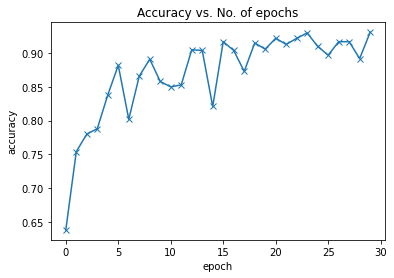

In [16]:
plot_accuracy(history_mod[0])

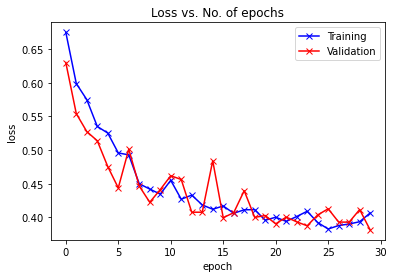

In [17]:
plot_loss(history_mod[0])

In [18]:
torch.save(history_mod, "Model_mod.pt")

In [19]:
trans = transforms.Compose([transforms.ToTensor(),transforms.Resize((150,150)), transforms.Pad(2)])

#Train
train = datasets.ImageFolder("train_another",transform = trans)

#Validation
validation = datasets.ImageFolder("validation_another",transform = trans)

#train loader
train_loader = torch.utils.data.DataLoader(train, 20, shuffle = True, num_workers = 4, pin_memory = True)

#test loader
val_loader = torch.utils.data.DataLoader(validation, 20, shuffle = False, num_workers = 4, pin_memory = True)

In [20]:
NewModel = NewCNN()

In [21]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 1e-4
#fitting the model on training data and record the result after each epoch
history_perso = MediumFit(num_epochs, lr, NewModel, train_loader, val_loader, opt_func)

Epoch [0], train_loss: 0.6795, val_loss: 0.7063, val_acc: 0.6150
Epoch [1], train_loss: 0.5999, val_loss: 0.6256, val_acc: 0.6900
Epoch [2], train_loss: 0.5269, val_loss: 0.4731, val_acc: 0.8300
Epoch [3], train_loss: 0.4806, val_loss: 0.6913, val_acc: 0.5930
Epoch [4], train_loss: 0.4779, val_loss: 0.3573, val_acc: 0.9560
Epoch [5], train_loss: 0.4788, val_loss: 0.3968, val_acc: 0.9240
Epoch [6], train_loss: 0.4338, val_loss: 0.4410, val_acc: 0.8720
Epoch [7], train_loss: 0.4352, val_loss: 0.4347, val_acc: 0.8730
Epoch [8], train_loss: 0.4236, val_loss: 0.4047, val_acc: 0.9090
Epoch [9], train_loss: 0.4275, val_loss: 0.4342, val_acc: 0.8740
Epoch [10], train_loss: 0.4147, val_loss: 0.4597, val_acc: 0.8560
Epoch [11], train_loss: 0.4129, val_loss: 0.3726, val_acc: 0.9390
Epoch [12], train_loss: 0.4085, val_loss: 0.3586, val_acc: 0.9630
Epoch [13], train_loss: 0.3965, val_loss: 0.4035, val_acc: 0.9100
Epoch [14], train_loss: 0.3920, val_loss: 0.3438, val_acc: 0.9710
Epoch [15], train_lo

In [22]:
torch.save(history_perso, "ModelPerso.pt")

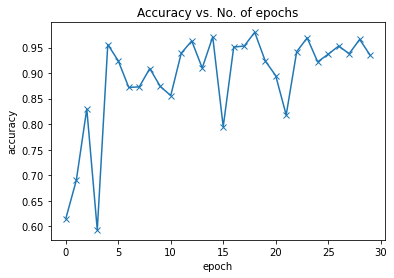

In [24]:
plot_accuracy(history_perso[0])

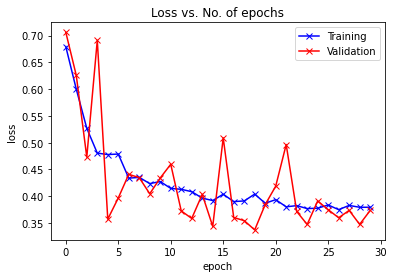

In [25]:
plot_loss(history_perso[0])